In [20]:
import pandas as pd
df=pd.read_csv("titanic_train.csv")

In [21]:
#passenger id and name column are not reqd to predict Survived 
df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [23]:
med=df["Age"].median()
#replacing the missing values of Age by median of age column
df["Age_cleaned"]=df["Age"].fillna(med)
#dropping our old age column
df.drop(["Age"],axis=1,inplace=True)

In [24]:
#dropping remaining nan values
df.dropna(inplace=True)

In [25]:
#applying one hot encoding to convert the categorical features to integers
df=pd.get_dummies(df,columns=["Sex","Embarked"],drop_first=True)

In [32]:
#we will now normalize the features to obtain them under the same scale.
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df1=pd.DataFrame(ss.fit_transform(df),columns=df.columns)
df1.head()

,Survived,Pclass,SibSp,Parch,Fare,Age_cleaned,Sex_male,Embarked_Q,Embarked_S
0,-0.786961,0.825209,0.431350,-0.474326,-0.500240,-0.563674,0.735342,-0.307941,0.616794
1,1.270711,-1.572211,0.431350,-0.474326,0.788947,0.669217,-1.359911,-0.307941,-1.621287
2,1.270711,0.825209,-0.475199,-0.474326,-0.486650,-0.255451,-1.359911,-0.307941,0.616794
3,1.270711,-1.572211,0.431350,-0.474326,0.422861,0.438050,-1.359911,-0.307941,0.616794
4,-0.786961,0.825209,-0.475199,-0.474326,-0.484133,0.438050,0.735342,-0.307941,0.616794


In [33]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
mod=KNeighborsClassifier(n_neighbors=1)
mod.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [46]:
y_pred=mod.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[122  35]
 [ 44  66]]
              precision    recall  f1-score   support

           0       0.73      0.78      0.76       157
           1       0.65      0.60      0.63       110

    accuracy                           0.70       267
   macro avg       0.69      0.69      0.69       267
weighted avg       0.70      0.70      0.70       267

0.704119850187266


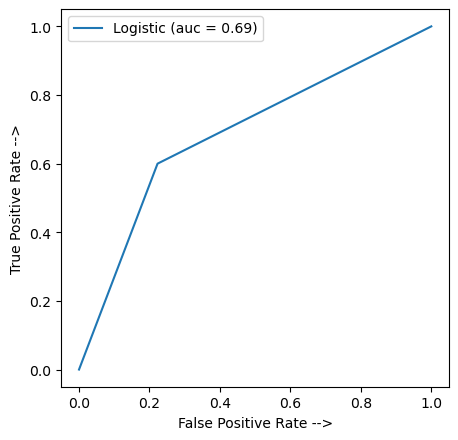

In [48]:
#roc and auc score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
fpr,tpr,threeshold=roc_curve(y_test,y_pred)
auc=auc(fpr,tpr)

plt.figure(figsize=(5, 5),dpi=100)
plt.plot(fpr,tpr, label='Logistic (auc = %0.2f)' % auc )
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()